In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

from train import SACTrain
import gymnasium as gym
import matplotlib.pyplot as plt
import panda_gym
import numpy as np
import utils

### LunarLander
#### Discrete environment

- #### Action Space: Discrete(4)
- #### Observation Space: Box([-1.5 -1.5 -5. -5. -3.1415927 -5. -0. -0. ], [1.5 1.5 5. 5. 3.1415927 5. 1. 1. ], (8,), float32)
- #### Rewards:
#### 1.changed by lander's distance, velocity, angle of inclination
#### 2. -0.03 with side engine firing
#### 3. -0.3 with main engine firing
#### 4. +10 for each leg is in contact with ground
#### 5. -100/+100 for crashing or landing safely

In [ ]:
env_name = "LunarLander-v2"
policy = SACTrain(env_name)
return_list, agent = policy.learn_discrete(num_episodes=2000)

Iteration 0:  50%|███████████████████▊                    | 99/200 [07:23<11:06,  6.60s/it, episode=90, return=-66.447]

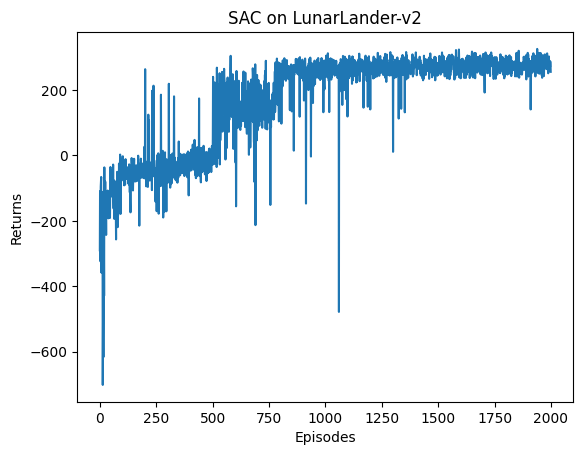

In [3]:
episodes = list(range(len(return_list)))
plt.plot(episodes, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title(f'SAC on {env_name}')
plt.show()

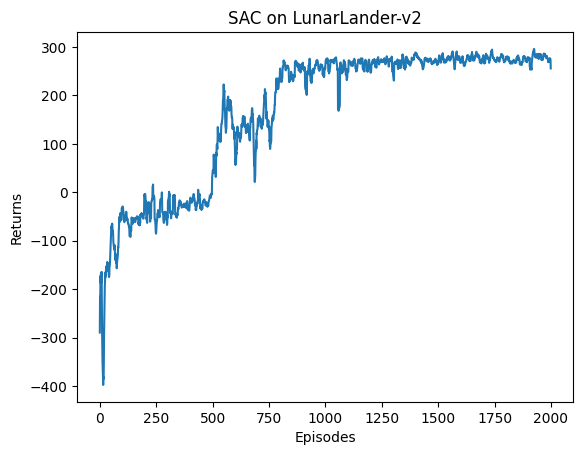

In [4]:
mv_return = utils.moving_average(return_list, 9)
plt.plot(episodes, mv_return)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title('SAC on {}'.format(env_name))
plt.show()

In [14]:
env = gym.make(env_name, render_mode="human")

for i in range(5):
    state, _ = env.reset()
    done = False
    while not done:
        action = agent.take_action(state)
        state, reward, done, truncation, _ = env.step(action)
        if done or truncation:
            state, _ = env.reset()
        env.render()

env.close()